In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
# Read CSV
file_one = os.path.join("Resources", "Unemployment_2010-2011.csv")
file_two = os.path.join("Resources", "Unemployment_2012-2014.csv")
unemployed_data_one = pd.read_csv(file_one)
unemployed_data_two = pd.read_csv(file_two)

unemployed_data_one.head()

,Country Name,Country Code,2010,2011
0,Afghanistan,AFG,20.600000,20.900000
1,Angola,AGO,10.800000,10.700000
2,Albania,ALB,25.799999,27.000000
3,Arab World,ARB,25.022214,28.117516
4,United Arab Emirates,ARE,9.800000,9.800000


In [3]:
unemployed_data_two.head()

,Country Name,Country Code,2012,2013,2014
0,Afghanistan,AFG,19.700001,21.100000,20.799999
1,Angola,AGO,10.700000,10.600000,10.500000
2,Albania,ALB,28.299999,28.700001,29.200001
3,Arab World,ARB,29.113212,29.335306,29.704569
4,United Arab Emirates,ARE,9.800000,9.900000,10.000000


Notice these two data frames share Country Name and Country Code, but have data from different years

In [7]:
# Merge our two data frames together on 'Country Name'
combined_unemployed_data = pd.merge(unemployed_data_two, unemployed_data_one, on='Country Name')
combined_unemployed_data.head()

,Country Name,Country Code_x,2012,2013,2014,Country Code_y,2010,2011
0,Afghanistan,AFG,19.700001,21.100000,20.799999,AFG,20.600000,20.900000
1,Angola,AGO,10.700000,10.600000,10.500000,AGO,10.800000,10.700000
2,Albania,ALB,28.299999,28.700001,29.200001,ALB,25.799999,27.000000
3,Arab World,ARB,29.113212,29.335306,29.704569,ARB,25.022214,28.117516
4,United Arab Emirates,ARE,9.800000,9.900000,10.000000,ARE,9.800000,9.800000


In [8]:
# Delete the duplicate 'Country Code' column and rename the first one back to 'Country Code'
combined_unemployed_data.drop('Country Code_y',axis=1, inplace=True)
#data.rename(columns={'gdp':'log(gdp)'}, inplace=True)
combined_unemployed_data.rename(columns={'Country Code_x':'Country Code'}, inplace=True)
combined_unemployed_data.head()

,Country Name,Country Code,2012,2013,2014,2010,2011
0,Afghanistan,AFG,19.700001,21.100000,20.799999,20.600000,20.900000
1,Angola,AGO,10.700000,10.600000,10.500000,10.800000,10.700000
2,Albania,ALB,28.299999,28.700001,29.200001,25.799999,27.000000
3,Arab World,ARB,29.113212,29.335306,29.704569,25.022214,28.117516
4,United Arab Emirates,ARE,9.800000,9.900000,10.000000,9.800000,9.800000


You could use something .loc as shown below to grab the unemployment data for the US and compare it to world average unemployment for 2010, 2011, 2012, 2013, 2014.

** Note. This code below will only work if you merged your dataframes into a variable named `combined_unemployed_data` **

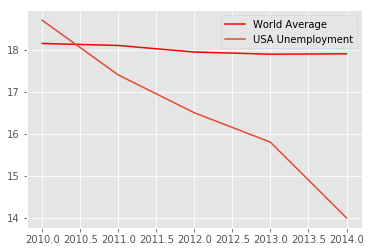

In [12]:
plt.style.use('ggplot')
usa_data = combined_unemployed_data[combined_unemployed_data["Country Code"]== "USA"]
average_unemployment = combined_unemployed_data.mean()
years = [2010, 2011, 2012, 2013, 2014]
usa_data.loc[:, ['2010', '2011', '2012', '2013', '2014']]
# 1. years = np.arange(2010, 2015, 1)
# 2. years = average_unemployment.keys()
world_avg, = plt.plot(years, average_unemployment, color="red", label="World Average" )
country_one, = plt.plot(years, usa_data.loc[208, ['2010', '2011', '2012', '2013', '2014']], label="USA Unemployment" )
plt.legend(handles=[world_avg, country_one], loc="best")

# Show the chart
plt.show()

The problem with the method above is you have to always say you want specific columns in order: ['2010', '2011', '2012', '2013', '2014']. Might not be great if you have 20 years of data, for example. A slightly more elegant way to do things is with a Pivot Table.

In [9]:
# Create a pivot table with the index of 'Country Code'
pivot_table = pd.pivot_table(combined_unemployed_data,index=['Country Code'])

In [10]:
pivot_table.head()


,2010,2011,2012,2013,2014
Country Code,,,,,
AFG,20.600000,20.900000,19.700001,21.100000,20.799999
AGO,10.800000,10.700000,10.700000,10.600000,10.500000
ALB,25.799999,27.000000,28.299999,28.700001,29.200001
ARB,25.022214,28.117516,29.113212,29.335306,29.704569
ARE,9.800000,9.800000,9.800000,9.900000,10.000000


Since we chose index="Country Code", the Pivot Table is indexed with the Country Code

In [11]:
# This means we can grab the data for a particular country simply by using
pivot_table.loc["USA",:]

2010    18.700001
2011    17.400000
2012    16.500000
2013    15.800000
2014    14.000000
Name: USA, dtype: float64

In [125]:
# Get the yearly average unemployment
average_unemployment = pivot_table.mean()
average_unemployment.head()

2010    17.892957
2011    17.902713
2012    18.148142
2013    18.100429
2014    17.943539
dtype: float64

In [127]:
# Create an array of the years when data was collected (2010-2014)
# Hint: Couple ways of doing this:
# years = np.arange(2010, 2015, 1)
# years = average_unemployment.keys()
# years = [2010, 2011, 2012, 2013, 2014]

years = ['2010', '2011', '2012', '2013', '2014']

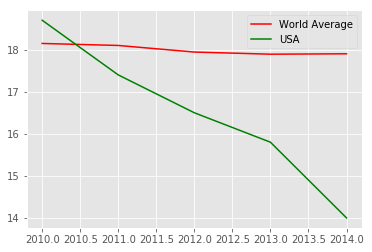

In [14]:
# Plot the world average as a line chart
world_avg, = plt.plot(years, average_unemployment, color='r', label='World Average')
# Plot the unemployment values for a single country
country_one, = plt.plot(years, pivot_table.loc["USA", :], color='green', label='USA')
# Create a legend for our chart
plt.legend(handles=[world_avg, country_one], loc='best')
# Show the chart
plt.show()